# Exponential Smoothing for Forcasting

### Importing Libraries

In [1]:
library(stats)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(corrplot)
library(broom)
library(ggpubr)
#library(MASS)

library(inspectdf)
library(lubridate)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



In [2]:
df_clean = read.csv("Preprocessed_Dataset_from_Nikhil.csv", sep = ",")
head(df_clean)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Weekly_Sales,Type,Size,Holiday_Flag
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<int>,<int>
1,1,2010-02-05,42.31,2.572,0,0,0,0,0,211.0964,8.106,FALSE,1643691,A,151315,0
2,1,2010-02-12,38.51,2.548,0,0,0,0,0,211.2422,8.106,TRUE,1641957,A,151315,1
3,1,2010-02-19,39.93,2.514,0,0,0,0,0,211.2891,8.106,FALSE,1611968,A,151315,0
4,1,2010-02-26,46.63,2.561,0,0,0,0,0,211.3196,8.106,FALSE,1409728,A,151315,0
5,1,2010-03-05,46.50,2.625,0,0,0,0,0,211.3501,8.106,FALSE,1554807,A,151315,0
6,1,2010-03-12,57.79,2.667,0,0,0,0,0,211.3806,8.106,FALSE,1439542,A,151315,0


### Creating the individual Dataframes for top 5 Stores

In [3]:
# Format the date column
df_clean$Date <- as.Date(df_clean$Date, format = "%Y-%m-%d")

# Filter the dataframe and keep only the specified columns
df_store_1 <- df_clean %>%
  filter(Store == 1) %>%
  select(Date, Weekly_Sales)


df_store_2 <- df_clean %>%
  filter(Store == 20) %>%
  select(Date, Weekly_Sales)


df_store_3 <- df_clean %>%
  filter(Store == 3) %>%
  select(Date, Weekly_Sales)


df_store_4 <- df_clean %>%
  filter(Store == 4) %>%
  select(Date, Weekly_Sales)


df_store_5 <- df_clean %>%
  filter(Store == 5) %>%
  select(Date, Weekly_Sales)

## Exponential Smoothing (All three Types) For the Store 2

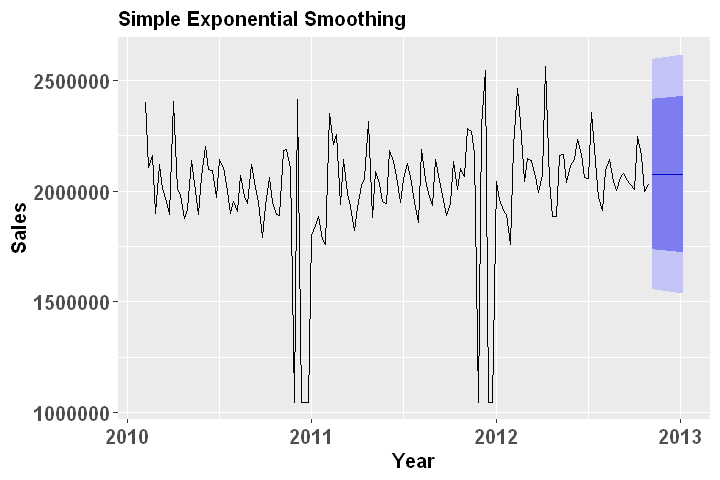

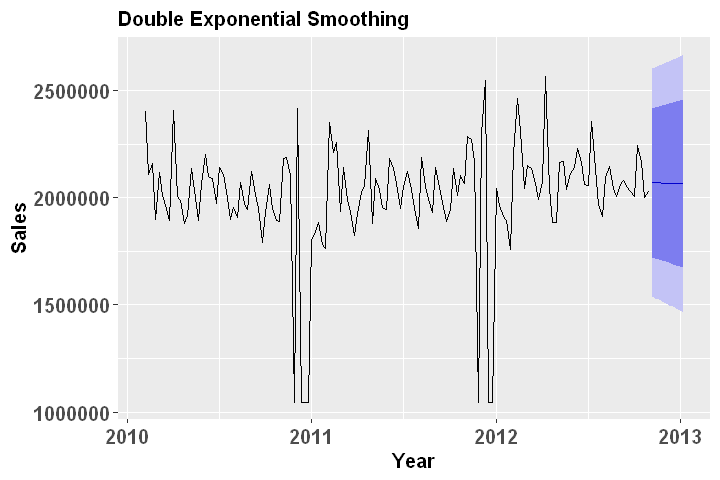

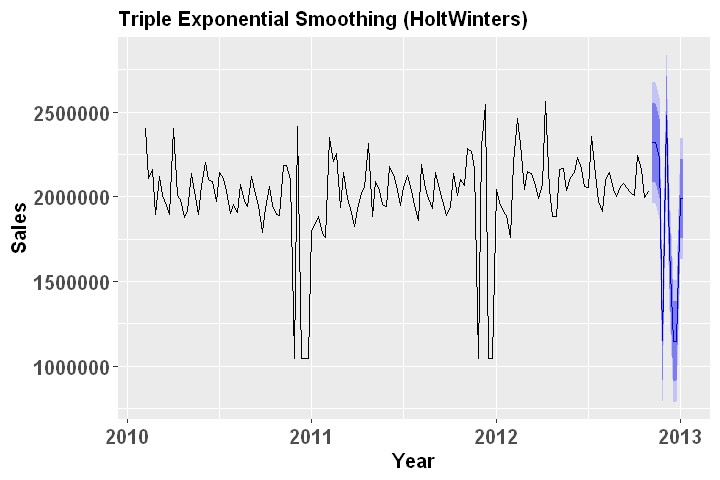

In [5]:
# Load the required packages
library(forecast)

# Create a time series object for the original data
start_week <- as.numeric(format(as.Date("2010-02-05"), "%U")) + 1
sales_ts <- ts(df_store_2$Weekly_Sales, start = c(2010, start_week), frequency = 52)

# Apply Simple, Double, and Triple Exponential Smoothing
ExpR_simple <- ses(sales_ts)
ExpR_double <- holt(sales_ts)
ExpR_triple <- HoltWinters(sales_ts)

# Forecast the future values (for example, next 10 weeks)
n_weeks <- 10
forecast_simple <- forecast(ExpR_simple, h = n_weeks)
forecast_double <- forecast(ExpR_double, h = n_weeks)
forecast_triple <- forecast(ExpR_triple, h = n_weeks)

# Set the size of the plotting device
options(repr.plot.width = 6, repr.plot.height = 4)

# Function to create bold text for titles, labels, and axis values
bold_text <- element_text(face = "bold", size = 12)

# Plot Simple Exponential Smoothing
autoplot(forecast_simple) +
  ggtitle("Simple Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Double Exponential Smoothing
autoplot(forecast_double) +
  ggtitle("Double Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Triple Exponential Smoothing (HoltWinters)
autoplot(forecast_triple) +
  ggtitle("Triple Exponential Smoothing (HoltWinters)") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)


#### Summary of the Simple Exponential Smoothing Model

In [6]:
summary(forecast_simple)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = sales_ts) 

  Smoothing parameters:
    alpha = 0.0908 

  Initial states:
    l = 2068155.8227 

  sigma:  265585.6

     AIC     AICc      BIC 
4285.725 4285.897 4294.613 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set 656.4663 263721.8 160243.7 -2.540946 9.715371 1.469643 0.1465277

Forecasts:
         Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2012.846        2076680 1736318 2417041 1556141 2597218
2012.865        2076680 1734918 2418441 1554000 2599359
2012.885        2076680 1733523 2419836 1551867 2601492
2012.904        2076680 1732134 2421225 1549743 2603616
2012.923        2076680 1730751 2422608 1547628 2605731
2012.942        2076680 1729373 2423986 1545521 2607838
2012.962        2076680 1728001 2425358 1543422 2609937
2012.981        2076680 1726634 2426725 1541331 2612028
2013.000        2076680 

#### Summary of the Double Exponential Smoothing Model

In [7]:
summary(forecast_double)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = sales_ts) 

  Smoothing parameters:
    alpha = 0.1637 
    beta  = 0.0025 

  Initial states:
    l = 2187678.1202 
    b = -9428.2279 

  sigma:  271079

     AIC     AICc      BIC 
4293.537 4293.975 4308.351 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE     MASE      ACF1
Training set 25410.16 267260.8 168858.6 -1.146452 9.991149 1.548654 0.1011365

Forecasts:
         Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2012.846        2070674 1723272 2418075 1539369 2601979
2012.865        2070153 1717989 2422318 1531564 2608743
2012.885        2069633 1712631 2426636 1523645 2615622
2012.904        2069113 1707198 2431028 1515612 2622614
2012.923        2068593 1701692 2435493 1507467 2629719
2012.942        2068073 1696115 2440031 1499212 2636933
2012.962        2067552 1690466 2444639 1490848 2644257
2012.981        2067032 1684746 2449318 1482376 2651688
2013.000       

#### Summary of the Triple Exponential Smoothing Model

In [8]:
summary(forecast_triple)


Forecast method: HoltWinters

Model Information:
Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = sales_ts)

Smoothing parameters:
 alpha: 0.01865542
 beta : 0.002814048
 gamma: 0.3644328

Coefficients:
           [,1]
a   2050796.561
b      1014.346
s1   271218.519
s2   267959.622
s3   178110.866
s4  -903233.163
s5   424809.606
s6  -365456.575
s7  -911673.473
s8  -911198.586
s9   -70468.771
s10  -71741.487
s11  -64983.321
s12 -137876.562
s13 -198275.348
s14  337645.489
s15  340617.406
s16  314192.836
s17   14152.570
s18  181798.847
s19   80173.126
s20   14287.219
s21  -81760.392
s22   12465.398
s23  250225.355
s24   79692.668
s25  185948.210
s26  -89459.737
s27  142748.129
s28  108383.047
s29    7241.089
s30   27678.817
s31  189776.265
s32  185990.009
s33  110475.891
s34   -1312.141
s35   60824.420
s36  212514.288
s37   76289.512
s38  -41142.214
s39 -122328.584
s40   63625.490
s41  114546.966
s42   24311.877
s43  -15634.564
s44  12

### Exponential Smoothing For the Store 2

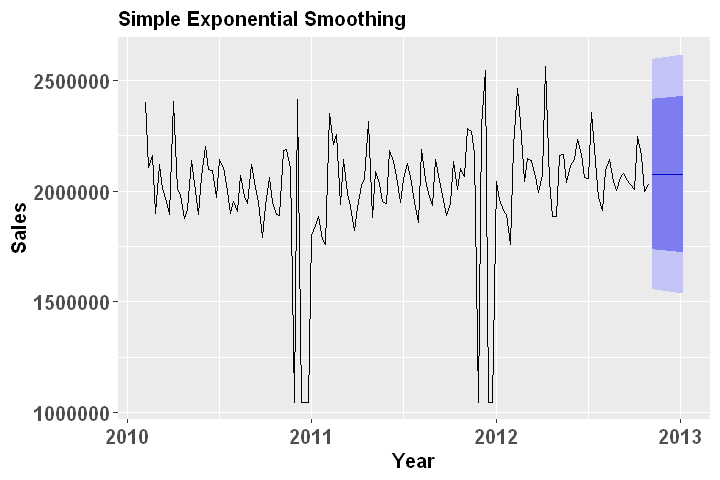

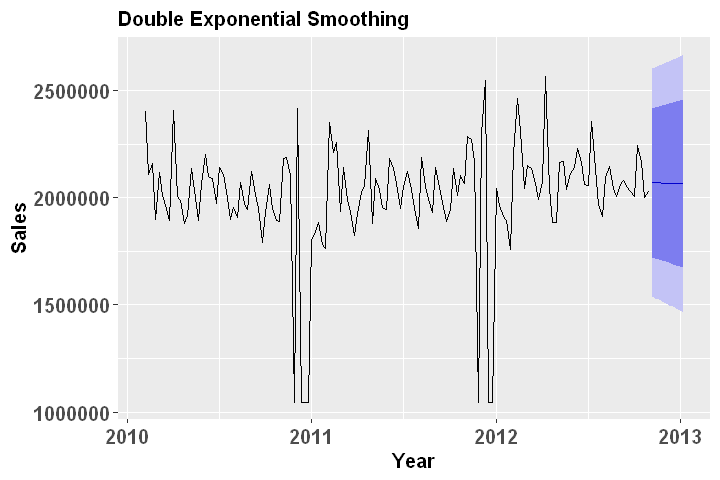

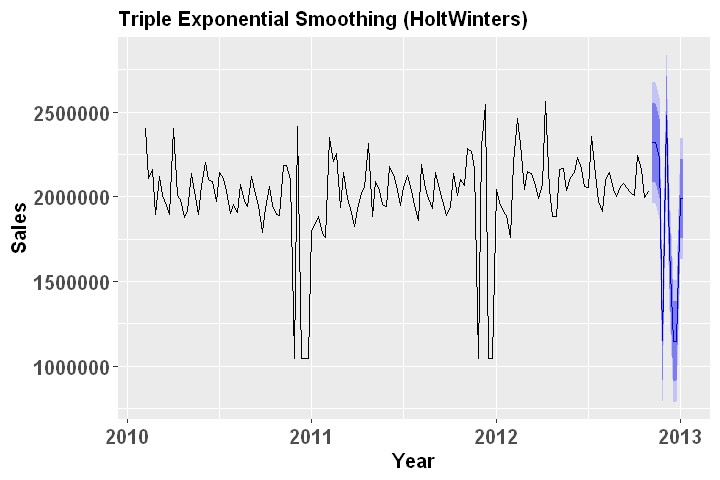

In [9]:
# Load the required packages
library(forecast)

# Create a time series object for the original data
start_week <- as.numeric(format(as.Date("2010-02-05"), "%U")) + 1
sales_ts <- ts(df_store_2$Weekly_Sales, start = c(2010, start_week), frequency = 52)

# Apply Simple, Double, and Triple Exponential Smoothing
ExpR_simple <- ses(sales_ts)
ExpR_double <- holt(sales_ts)
ExpR_triple <- HoltWinters(sales_ts)

# Forecast the future values (for example, next 10 weeks)
n_weeks <- 10
forecast_simple <- forecast(ExpR_simple, h = n_weeks)
forecast_double <- forecast(ExpR_double, h = n_weeks)
forecast_triple <- forecast(ExpR_triple, h = n_weeks)

# Set the size of the plotting device
options(repr.plot.width = 6, repr.plot.height = 4)

# Function to create bold text for titles, labels, and axis values
bold_text <- element_text(face = "bold", size = 12)

# Plot Simple Exponential Smoothing
autoplot(forecast_simple) +
  ggtitle("Simple Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Double Exponential Smoothing
autoplot(forecast_double) +
  ggtitle("Double Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Triple Exponential Smoothing (HoltWinters)
autoplot(forecast_triple) +
  ggtitle("Triple Exponential Smoothing (HoltWinters)") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)


### Exponential Smoothing For the Store 3

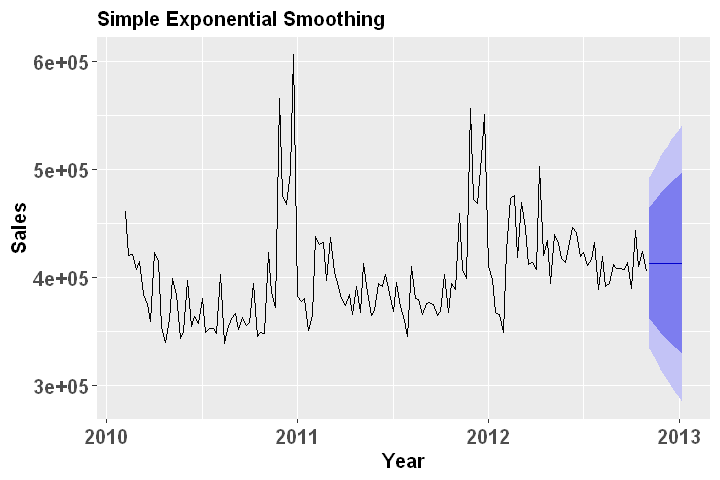

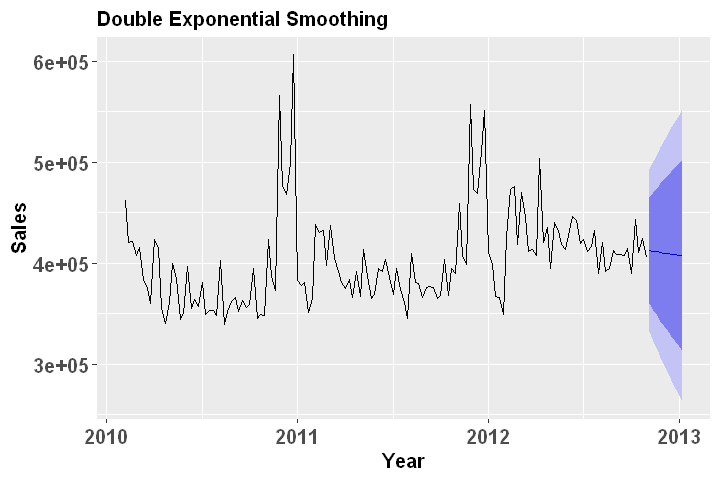

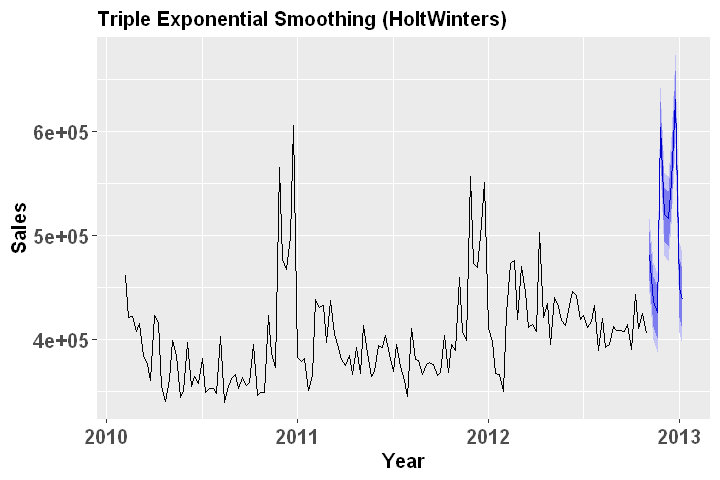

In [10]:
# Load the required packages
library(forecast)

# Create a time series object for the original data
start_week <- as.numeric(format(as.Date("2010-02-05"), "%U")) + 1
sales_ts <- ts(df_store_3$Weekly_Sales, start = c(2010, start_week), frequency = 52)

# Apply Simple, Double, and Triple Exponential Smoothing
ExpR_simple <- ses(sales_ts)
ExpR_double <- holt(sales_ts)
ExpR_triple <- HoltWinters(sales_ts)

# Forecast the future values (for example, next 10 weeks)
n_weeks <- 10
forecast_simple <- forecast(ExpR_simple, h = n_weeks)
forecast_double <- forecast(ExpR_double, h = n_weeks)
forecast_triple <- forecast(ExpR_triple, h = n_weeks)

# Set the size of the plotting device
options(repr.plot.width = 6, repr.plot.height = 4)

# Function to create bold text for titles, labels, and axis values
bold_text <- element_text(face = "bold", size = 12)

# Plot Simple Exponential Smoothing
autoplot(forecast_simple) +
  ggtitle("Simple Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Double Exponential Smoothing
autoplot(forecast_double) +
  ggtitle("Double Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Triple Exponential Smoothing (HoltWinters)
autoplot(forecast_triple) +
  ggtitle("Triple Exponential Smoothing (HoltWinters)") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)


### Exponential Smoothing For the Store 4

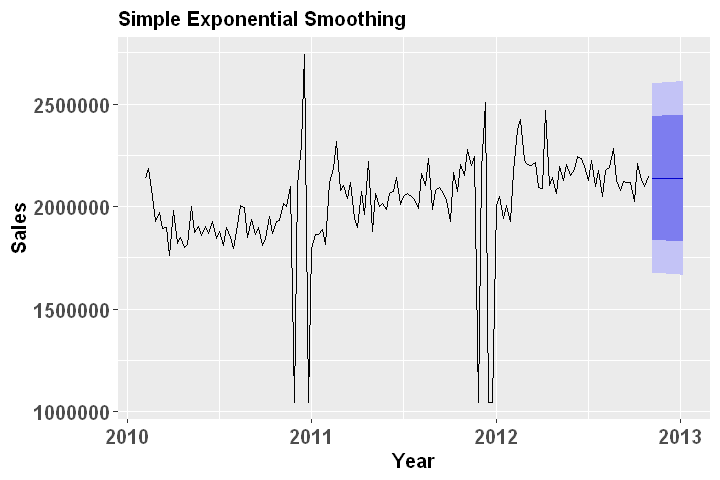

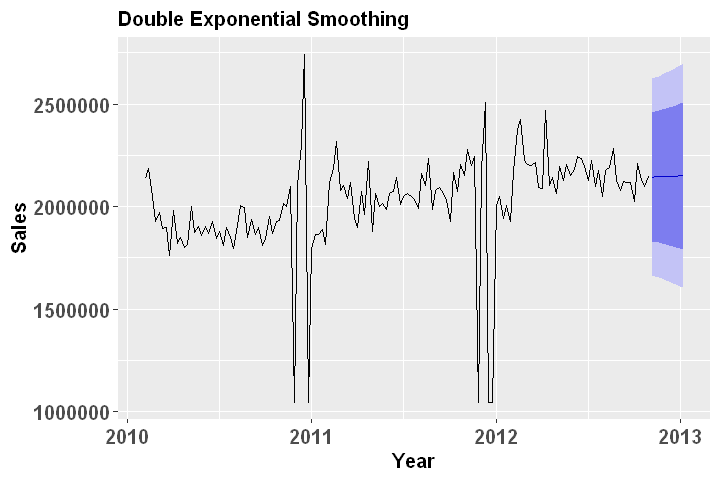

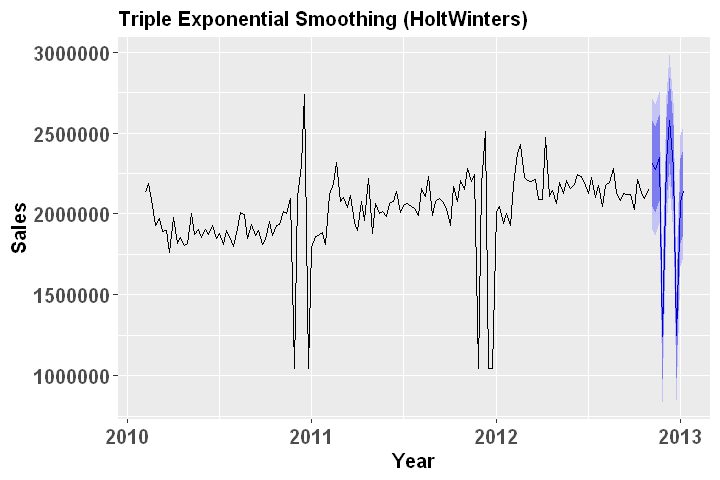

In [11]:
# Load the required packages
library(forecast)

# Create a time series object for the original data
start_week <- as.numeric(format(as.Date("2010-02-05"), "%U")) + 1
sales_ts <- ts(df_store_4$Weekly_Sales, start = c(2010, start_week), frequency = 52)

# Apply Simple, Double, and Triple Exponential Smoothing
ExpR_simple <- ses(sales_ts)
ExpR_double <- holt(sales_ts)
ExpR_triple <- HoltWinters(sales_ts)

# Forecast the future values (for example, next 10 weeks)
n_weeks <- 10
forecast_simple <- forecast(ExpR_simple, h = n_weeks)
forecast_double <- forecast(ExpR_double, h = n_weeks)
forecast_triple <- forecast(ExpR_triple, h = n_weeks)

# Set the size of the plotting device
options(repr.plot.width = 6, repr.plot.height = 4)

# Function to create bold text for titles, labels, and axis values
bold_text <- element_text(face = "bold", size = 12)

# Plot Simple Exponential Smoothing
autoplot(forecast_simple) +
  ggtitle("Simple Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Double Exponential Smoothing
autoplot(forecast_double) +
  ggtitle("Double Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Triple Exponential Smoothing (HoltWinters)
autoplot(forecast_triple) +
  ggtitle("Triple Exponential Smoothing (HoltWinters)") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)


### Exponential Smoothing For the Store 5

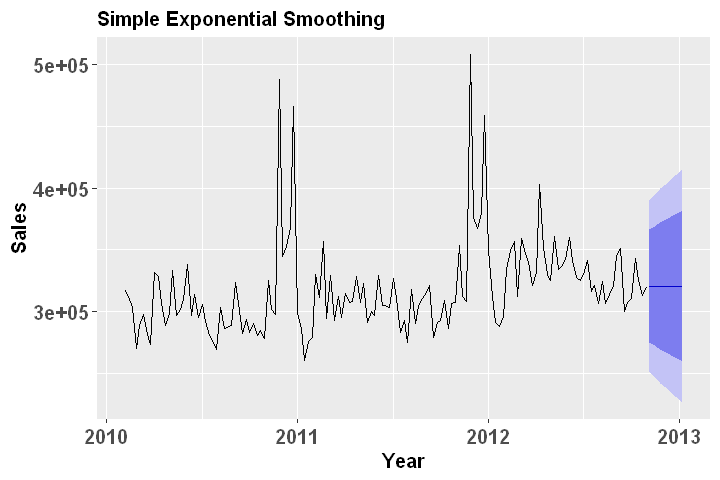

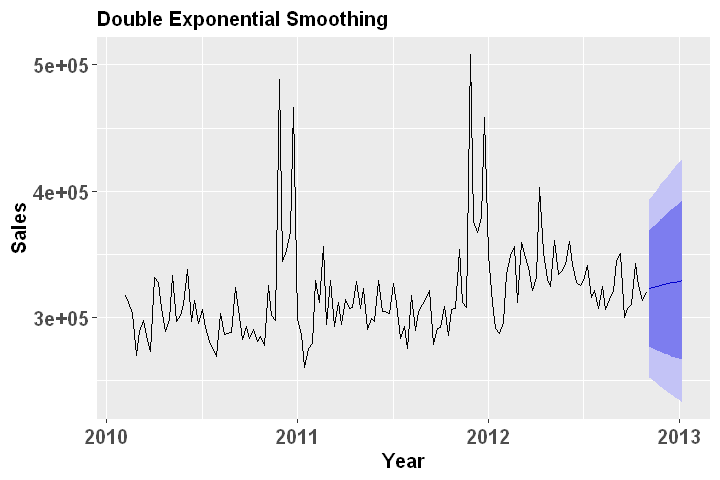

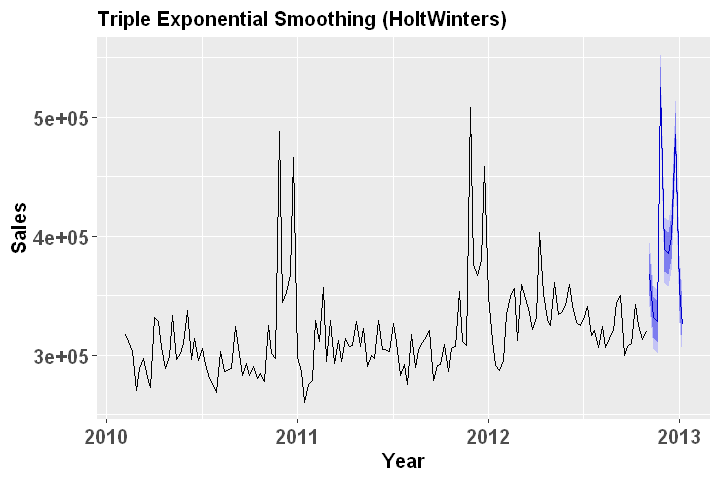

In [12]:
# Load the required packages
library(forecast)

# Create a time series object for the original data
start_week <- as.numeric(format(as.Date("2010-02-05"), "%U")) + 1
sales_ts <- ts(df_store_5$Weekly_Sales, start = c(2010, start_week), frequency = 52)

# Apply Simple, Double, and Triple Exponential Smoothing
ExpR_simple <- ses(sales_ts)
ExpR_double <- holt(sales_ts)
ExpR_triple <- HoltWinters(sales_ts)

# Forecast the future values (for example, next 10 weeks)
n_weeks <- 10
forecast_simple <- forecast(ExpR_simple, h = n_weeks)
forecast_double <- forecast(ExpR_double, h = n_weeks)
forecast_triple <- forecast(ExpR_triple, h = n_weeks)

# Set the size of the plotting device
options(repr.plot.width = 6, repr.plot.height = 4)

# Function to create bold text for titles, labels, and axis values
bold_text <- element_text(face = "bold", size = 12)

# Plot Simple Exponential Smoothing
autoplot(forecast_simple) +
  ggtitle("Simple Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Double Exponential Smoothing
autoplot(forecast_double) +
  ggtitle("Double Exponential Smoothing") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)

# Plot Triple Exponential Smoothing (HoltWinters)
autoplot(forecast_triple) +
  ggtitle("Triple Exponential Smoothing (HoltWinters)") +
  xlab("Year") +
  ylab("Sales") +
  theme(plot.title = bold_text,
        axis.title.x = bold_text,
        axis.title.y = bold_text,
        axis.text = bold_text)
